## Introduction
In the world of data science and machine learning, understanding the significance of not just diving headfirst into building models but rather meticulously exploring and understanding the datasets at hand is crucial.

In this article I embark on a journey through the pre-modeling phase, focusing on essential exploratory data analysis (EDA) techniques. I am going to be using a dataset from Kaggle, a website where one can find different datasets, people can upload their machine learning models, there's even competition and sometimes prizes for winners. The dataset is called "Credit Car Prediction", and it has multiple variables regarding the financial and social status of individuals. The goal of the dataset is to determine if an individual is or not eligible for a credit card.

We start off importing the libraries we are going to be using, and loading the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

train_df = pd.read_csv("./002-train_data.csv")
test_df = pd.read_csv("./002-test_data.csv")

## Exploring the dataset
Let's take a look at the dataset, see what types of features there are, what information they bring to the table, how many there are, how many entries and some of the statistics of each.

In [3]:
train_df.head(5)

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5037048,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,With parents,-16271,-3111,1,0,0,0,Core staff,2.0,-17.0,0
1,5044630,F,Y,N,1,135000.0,Commercial associate,Higher education,Single / not married,House / apartment,-10130,-1651,1,0,0,0,Accountants,2.0,-1.0,0
2,5079079,F,N,Y,2,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-12821,-5657,1,0,0,0,Laborers,4.0,-38.0,0
3,5112872,F,Y,Y,0,360000.0,Commercial associate,Higher education,Single / not married,House / apartment,-20929,-2046,1,0,0,1,Managers,1.0,-11.0,0
4,5105858,F,N,N,0,270000.0,Working,Secondary / secondary special,Separated,House / apartment,-16207,-515,1,0,1,0,NaN,1.0,-41.0,0


In [4]:
train_df.describe()

,ID,Children count,Income,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Family member count,Account age,Is high risk
count,2.916500e+04,29165.000000,2.916500e+04,29165.000000,29165.000000,29165.0,29165.000000,29165.000000,29165.000000,29165.000000,29165.000000,29165.000000
mean,5.078232e+06,0.430790,1.868904e+05,-15979.477490,59257.761255,1.0,0.224310,0.294977,0.090279,2.197531,-26.137734,0.017110
std,4.182400e+04,0.741882,1.014096e+05,4202.997485,137655.883458,0.0,0.417134,0.456040,0.286587,0.912189,16.486702,0.129682
min,5.008804e+06,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,5.042047e+06,0.000000,1.215000e+05,-19444.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,0.000000
50%,5.074666e+06,0.000000,1.575000e+05,-15565.000000,-1557.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,0.000000
75%,5.114629e+06,1.000000,2.250000e+05,-12475.000000,-412.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,0.000000
max,5.150485e+06,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,1.000000


### Dropping features
ID can be quickly dropped, as it provides no information about the client. It is merely used by databases to assign a unique value to any given client.

In [5]:
train_df_step1 = train_df.drop(['ID'], axis=1)

Looking at the mobile phones statistics:

  - It has a mean of 1
  - It has a standart deviation of 0
  - It has a minimum of 1
  - It has a maximum of 1
  
It is simply a feature full of 1's, it provides no information. If we encountered in the validation set or real life a person with no mobile phone, the model can't possibly learn anything about them.

In [6]:
train_df_step2 = train_df_step1.drop(['Has a mobile phone'], axis=1)

### Transforming categorical features
Focusing on categorical features, there are three that we need to transform into discrete features. 

  - Gender we replace M to 0 and F to 1.
  - Has a car we replace N to 0 and Y to 1.
  - Has a property we replace N to 0 and Y to 1.

In [7]:
#replacing an entire column of strings for integers raises some warnings
with pd.option_context("future.no_silent_downcasting", True): 
    train_df_step2['Gender'] = train_df_step2['Gender'].replace({'M': int(0), 'F': int(1)}).astype(int)
    train_df_step2['Has a car'] = train_df_step2['Has a car'].replace({'N': int(0), 'Y': int(1)}).astype(int)
    train_df_step2['Has a property'] = train_df_step2['Has a property'].replace({'N': int(0), 'Y': int(1)}).astype(int)

<div class="alert alert-warning">
<b>Warning:</b> Replacing an entire column of strings for integers raises some warnings. Consider using "#with pd.option_context("future.no_silent_downcasting", True):" to remove the warning.
</div>

Next up are features that have more than two possible categories, like Employment status, Education level, Marital status, Dwelling and Job title. 

Plotting them is a very helpful way to visualize how many categories there are and the population of each. 

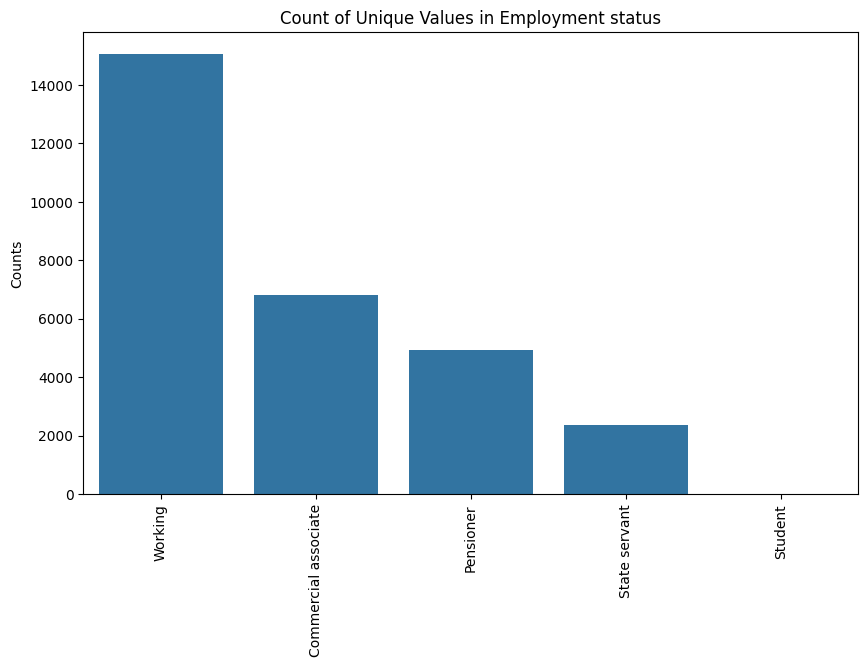

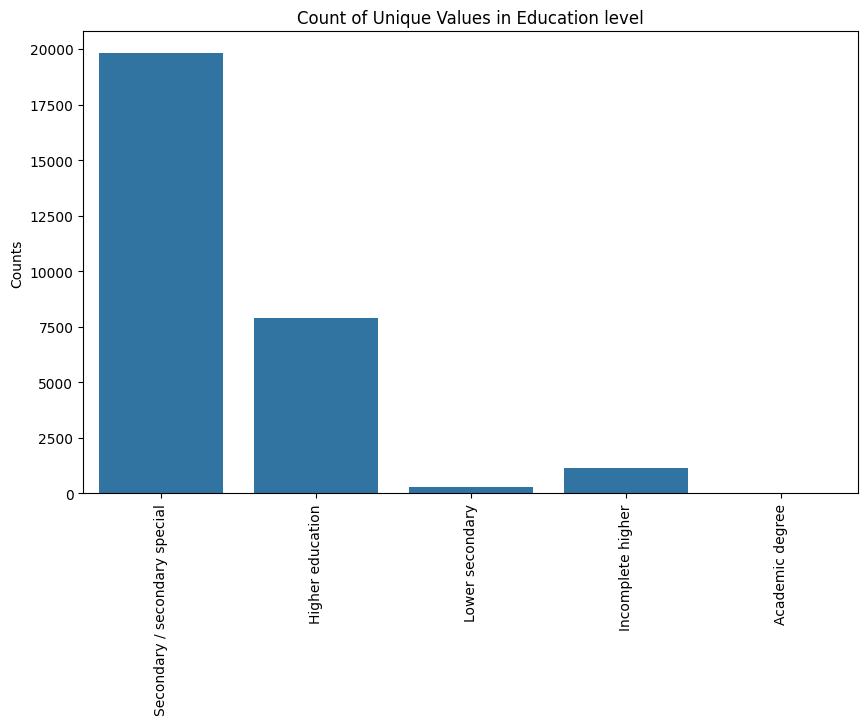

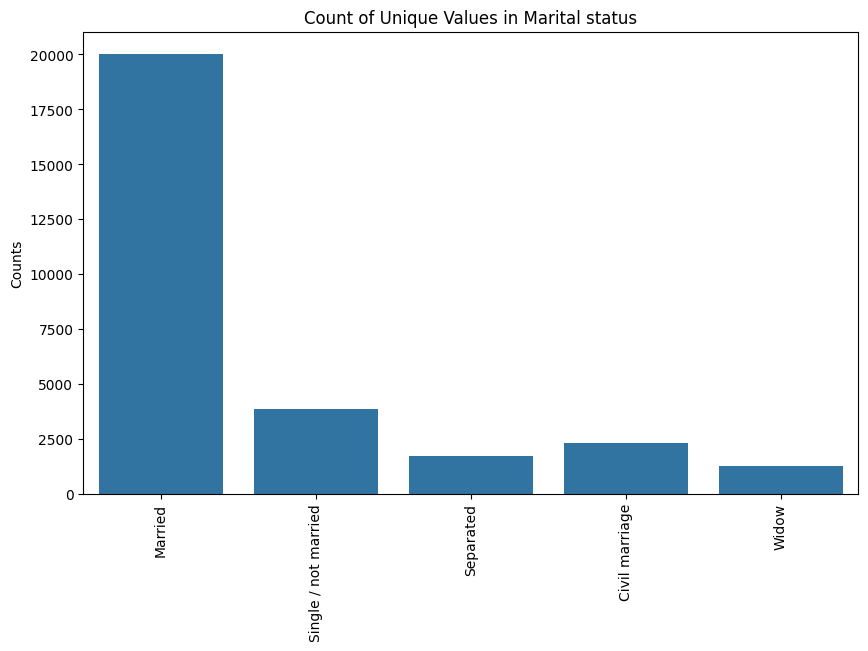

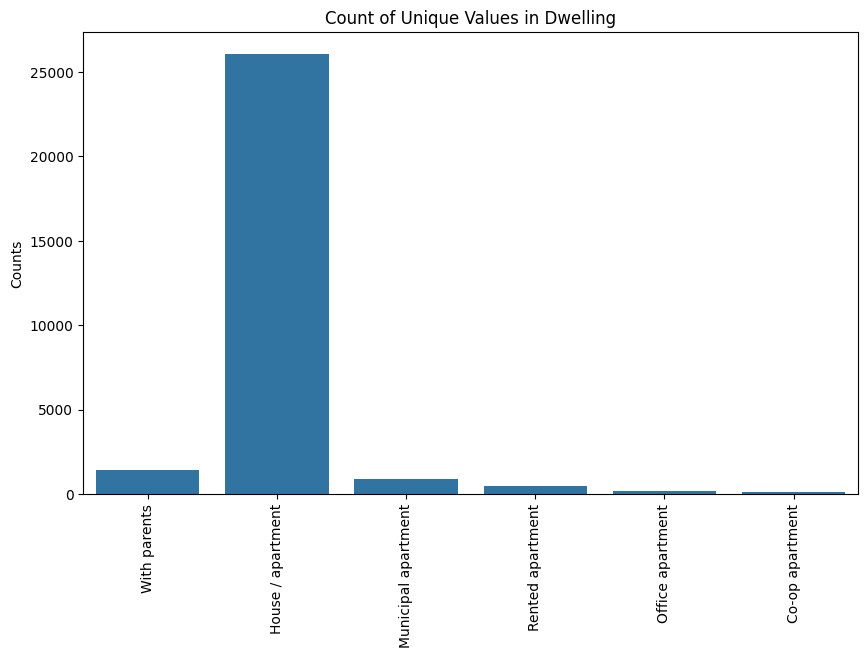

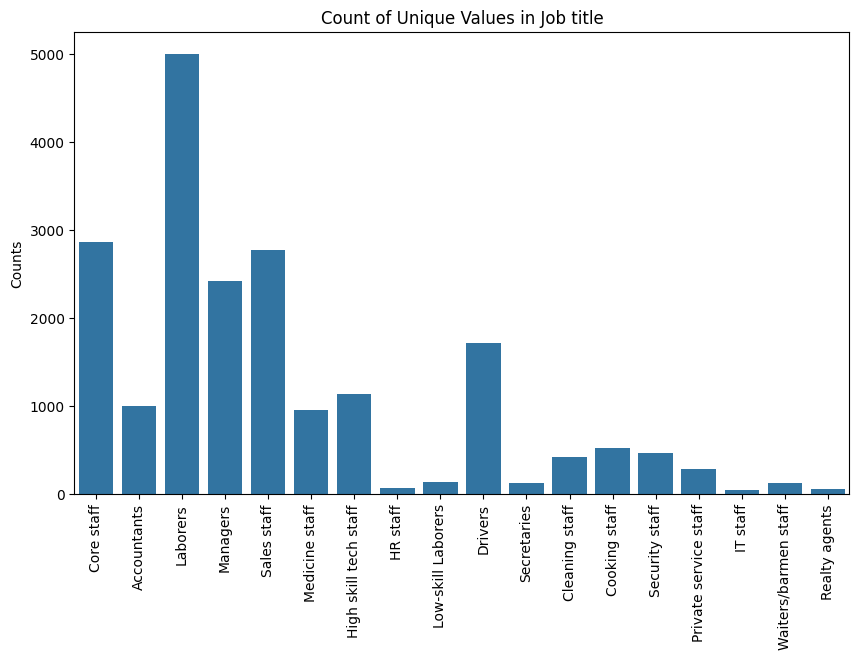

In [8]:
# List of features to visualize
features = ['Employment status', 'Education level', 'Marital status', 'Dwelling', 'Job title']

# Loop through the features and create a count plot for each
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=train_df_step2, x=feature)
    plt.title(f'Count of Unique Values in {feature}')
    plt.xlabel('')
    plt.xticks(rotation=90)
    plt.ylabel('Counts')
    
plt.show()

Job title has NaN values though, are they all students and pensioners that don't work anymore? Or are there no job title for some people's jobs? Let's combine Employment status and Job title, so we can see what the employment status is of those whose job title is missing.

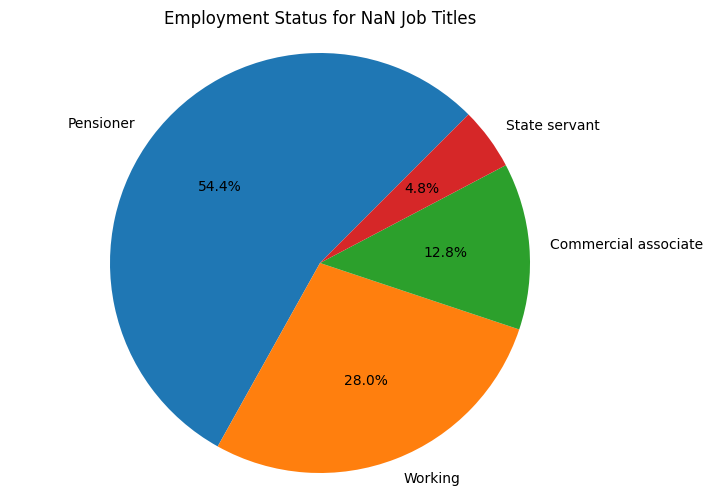

In [10]:
nan_job_title_df = train_df[train_df['Job title'].isna()]
employment_status_counts = nan_job_title_df['Employment status'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(employment_status_counts, labels=employment_status_counts.index, autopct='%1.1f%%', startangle=45)
plt.title('Employment Status for NaN Job Titles')
plt.axis('equal')
plt.show()

It's all around the place. Gathering the information we have so far:

  - Job title has 9027 NaN values (roughly 30%)
  - Missing job titles seem to be all over the place compared their employment status, MCAR (Missing Completely at Random)
  - Imputing would be complicated (but not impossible)
  - Encoding this feature would increase the dimensionality significantly

Based on that, I will remove the feature altogether, and apply OHE (One Hot Encoding).

In [11]:
train_df_step3 = train_df_step2.drop(['Job title'], axis=1)

train_df_step4 = pd.get_dummies(train_df_step3, columns=['Employment status', 'Education level', 'Marital status', 'Dwelling'], dtype=int)

### Correlation matrix
Finally, let's take a look at the correlation matrix.

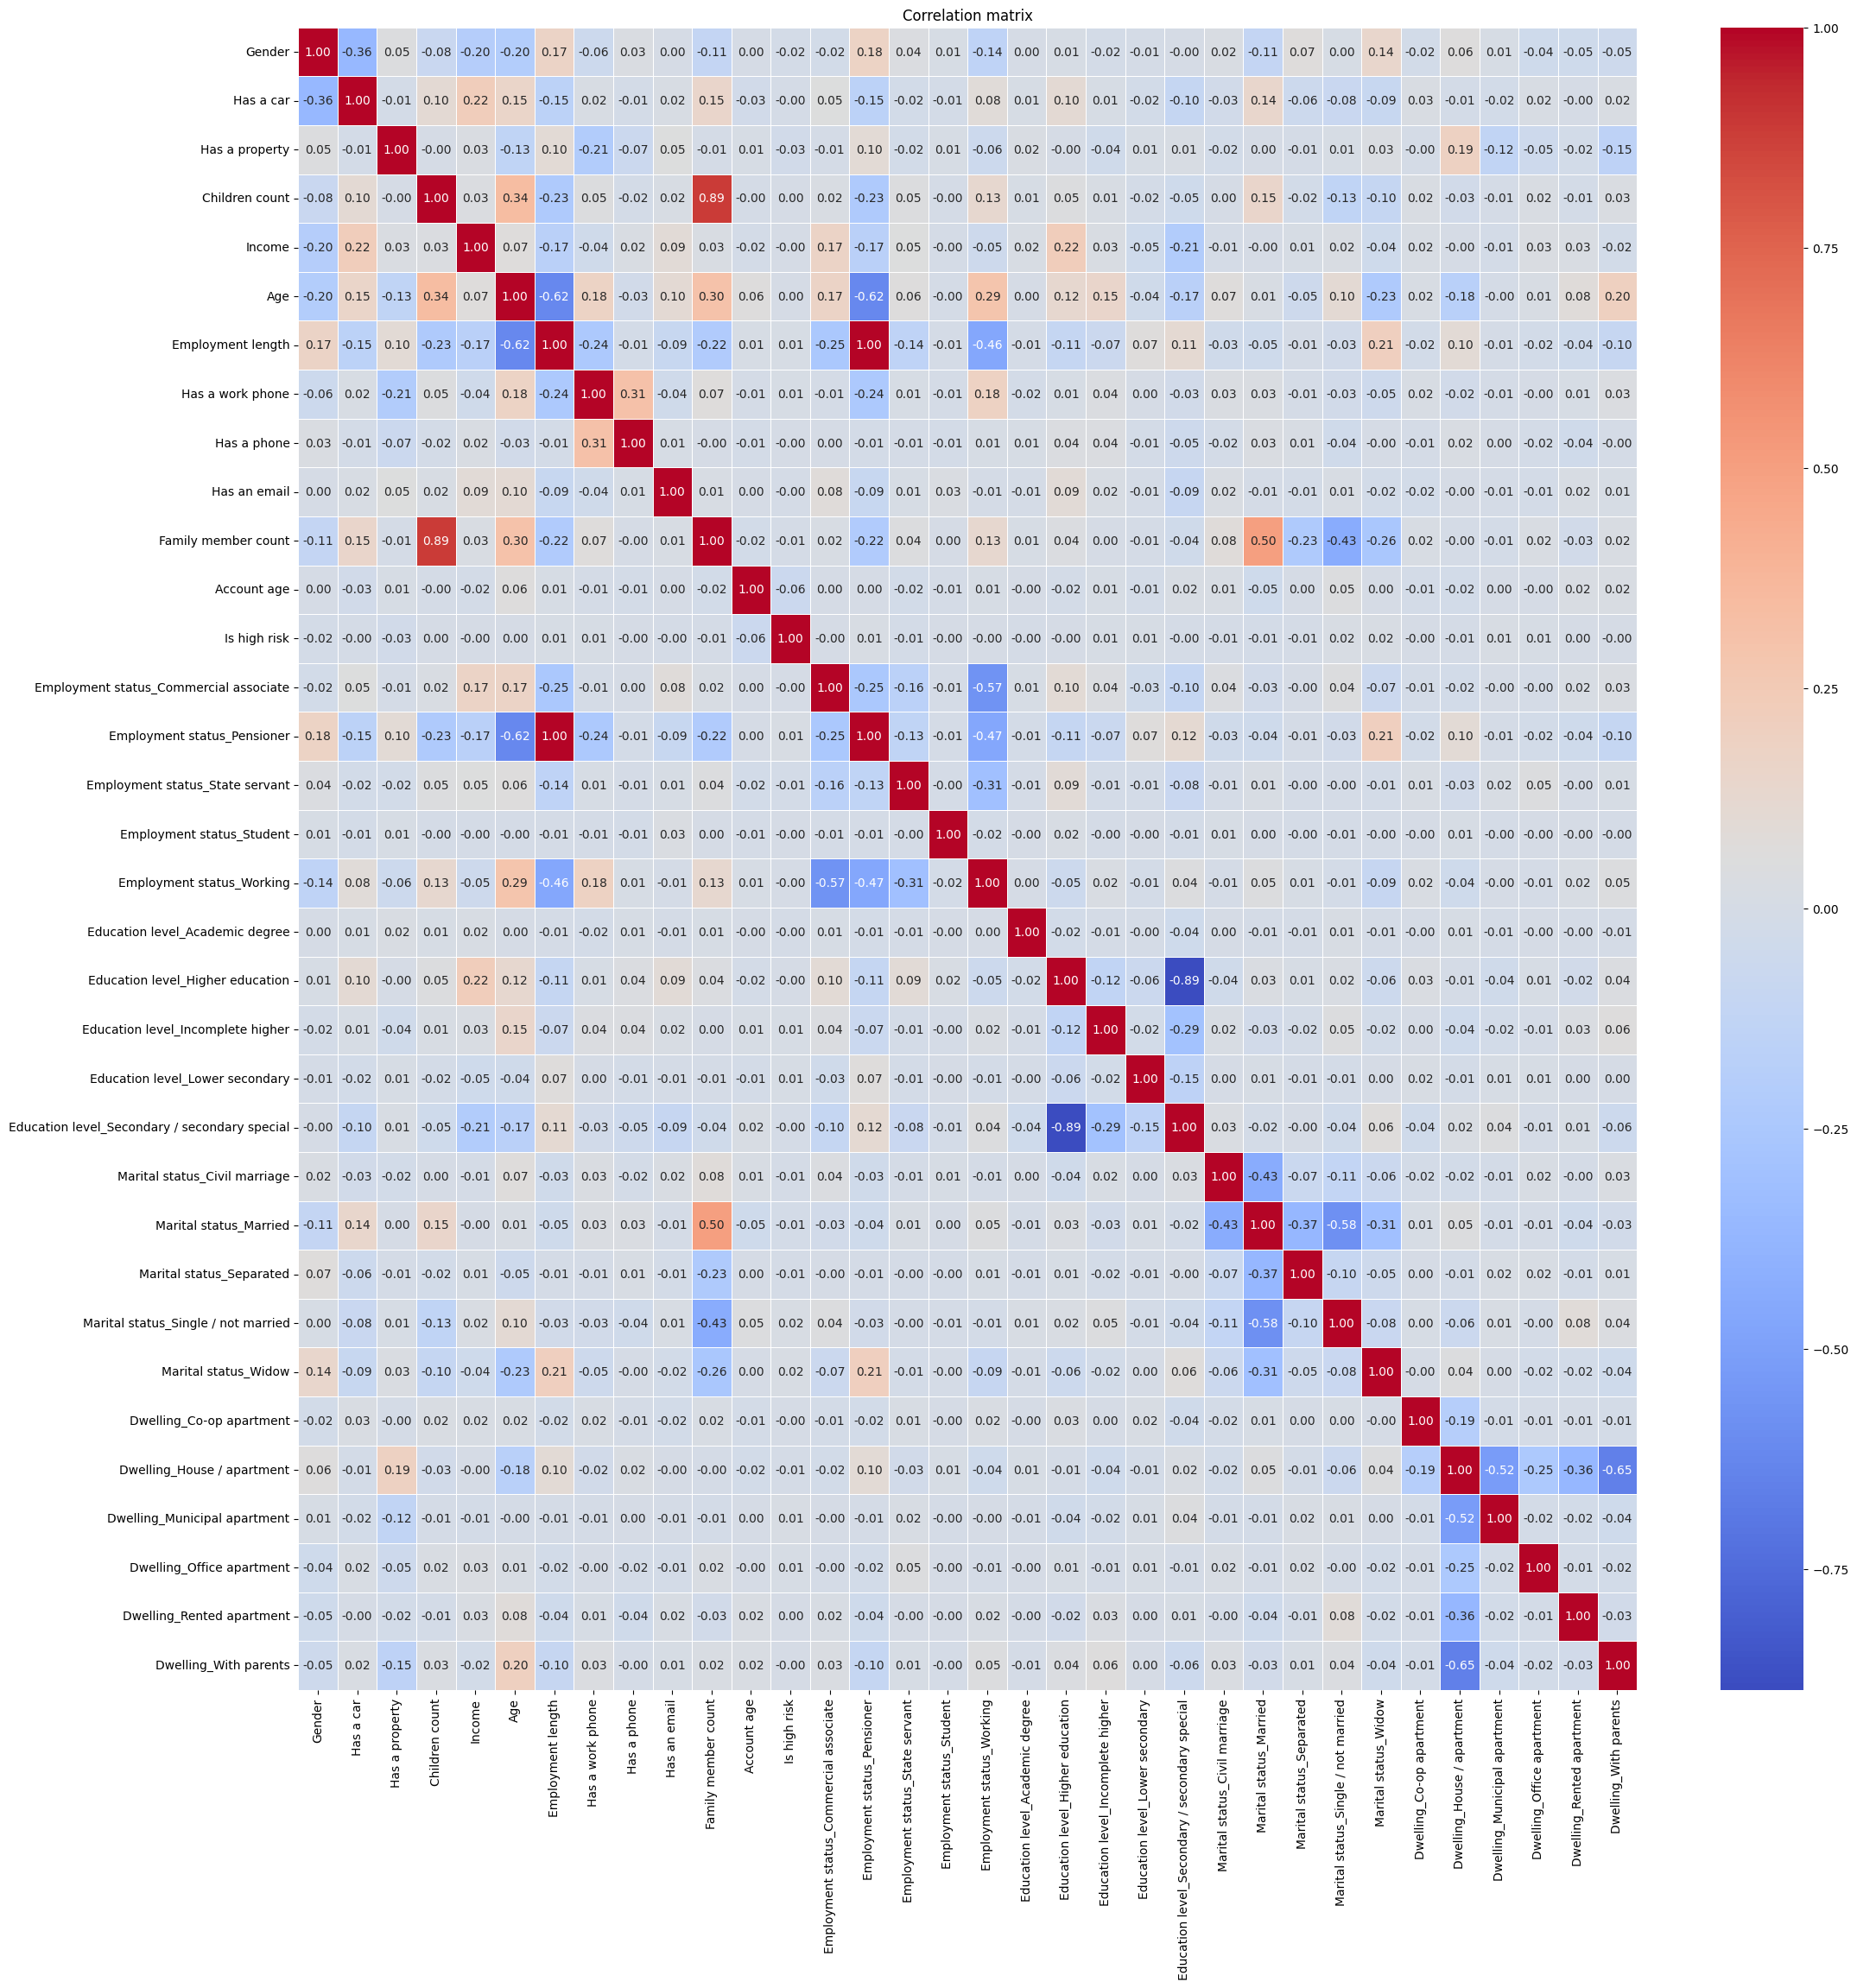

In [12]:
correlation_matrix = train_df_step4.corr()

plt.figure(figsize=(25,25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation matrix')
plt.show()

There are two things that might be interesting to explore further: 

  - Correlation between 'Family member count' and 'Children count'.
  - Correlation between 'Employment status_Pensioner' and 'Employment length'.

'Family member count' and 'Children count' are obviously correlated, but it is not a correlation of 1. That means that sometimes, more family members taken into account other than children, or even sometimes children are not taken into account for family, therefore we can't really remove this feature. It is adding some information after all.

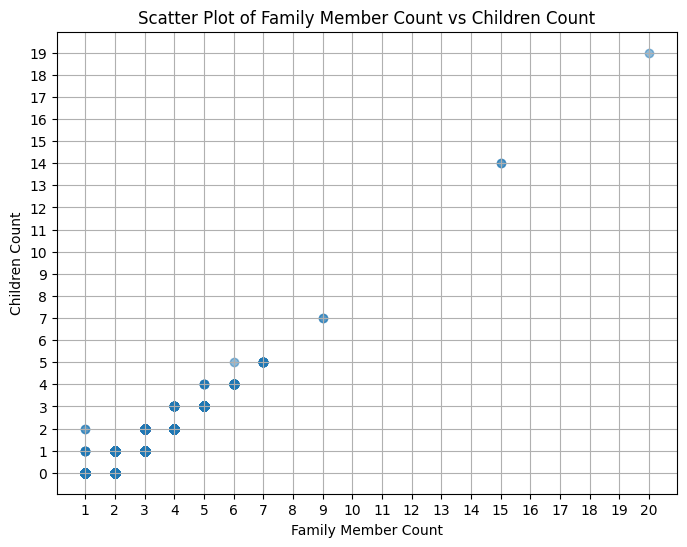

In [13]:
family_member_count = train_df_step4['Family member count']
children_count = train_df_step4['Children count']

plt.figure(figsize=(8, 6))
plt.scatter(family_member_count, children_count, alpha=0.5)
plt.title('Scatter Plot of Family Member Count vs Children Count')
plt.xlabel('Family Member Count')
plt.ylabel('Children Count')
plt.grid(True)

plt.gca().xaxis.set_major_locator(MultipleLocator(1))
plt.gca().yaxis.set_major_locator(MultipleLocator(1))

plt.show()

We can see that most of the time, children make up for most of the family members, but sometimes (especifically for 1 family member), there are a few cases with more children than family members.

Moving to the next point to explore, let's take a look at those with an employment status of pensioner and their respective 'Employment length'.

In [14]:
employment_status_pensioner = train_df_step4[(train_df_step4['Employment status_Pensioner'] == 1)]
employment_status_pensioner['Employment length'].value_counts()

Employment length
 365243    4908
-678          1
-443          1
-586          1
-672          1
-673          1
-3680         1
-2745         1
-2208         1
-620          1
-1325         1
-1644         1
-2269         1
Name: count, dtype: int64

Out of 4920 pensioners, only 12 have an 'Employment length' different than the value '365243'. That is a 0.24% over the pensioners and 0.04% over the dataset. It is most likely safe to remove one of these two features, as they are explaining the same thing. But which one to remove matters: 'Employment status_Pensioner' has the same information as 'Employment length', but not the other way around. 'Employment length' has information about those that are not Pensioners.

That means we can only remove the Employment status_Pensioner feature.

In [15]:
train_df_step5 = train_df_step4.drop(['Employment status_Pensioner'], axis=1)

### Scaling features
At last, before training a machine learning model, we should scale features, given that some of them like 'Income' and 'Employment length' are not proportional to the others.

In [16]:
scaler = MinMaxScaler()
train_df_step6 = scaler.fit_transform(train_df_step5)
train_df_step6 = pd.DataFrame(train_df_step6, columns=train_df_step5.columns)

## Training a model
To train a model we first split the data in input (x_data) and output (y_data). Then we apply the following: 
  - Split dataset between train and test sets.
  - Apply cross validation
  - Search for best hyperparameters
  - Make predictions
  - Calculate accuracy

To visually see the results, we can use a confusion matrix.

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy on testing set: 0.9852563003600205


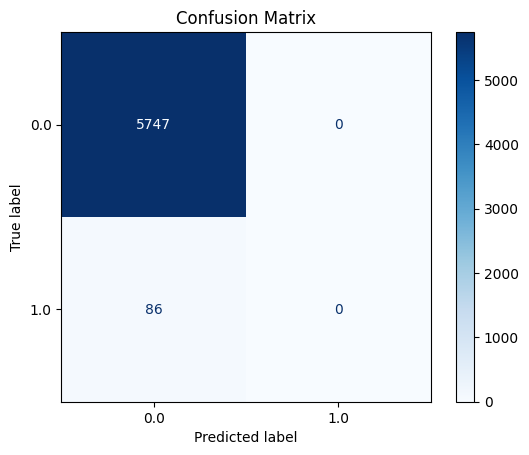

In [17]:
y_data = train_df_step6['Is high risk']
x_data = train_df_step6.drop(columns=['Is high risk'])

def train_model(x, y):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
    rf_classifier = RandomForestClassifier(random_state=42)
    param_grid = {
        'n_estimators': [10, 100],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 4],
        'min_samples_leaf': [1, 3]
    }

    grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    print("Best hyperparameters:", best_params)
    best_model = grid_search.best_estimator_

    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy on testing set:", accuracy)
    
    y_pred = best_model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()
    
    return best_model
    
best_model = train_model(x_data, y_data)

98.52% accuracy is great! It means almost every observation we made about the dataset were appropiate and helped us build an accurate model... or not.

Some machine learning models, especially those that are tree based, tend to fall into a trap of unbalanced classes. And in this dataset, there's a huge unbalance in our output 'Is high risk'.

In [18]:
train_df_step6['Is high risk'].value_counts()

Is high risk
0.0    28666
1.0      499
Name: count, dtype: int64

Only 1.74% are high risk. What does that mean? Well... instead of analyzing the dataset, evaluating models, hyperparameters, cross validation and whatnot, it would be more effective to say "No client is high risk". That would give us an accuracy of 98.26%. Looking at the confusion matrix, that is exactly what the model learned and did.

### Balancing classes
One way to fix this is to balance the classes, either by undersampling or oversampling. Let's try and use oversampling, as we don't really want to loose 28000 entries of valuable information.


In [19]:
smote = SMOTE()

x_smote, y_smote = smote.fit_resample(x_data, y_data)

print('Original dataset shape')
print(y_data.value_counts())
print('\nResample dataset shape')
print(y_smote.value_counts())

Original dataset shape
Is high risk
0.0    28666
1.0      499
Name: count, dtype: int64

Resample dataset shape
Is high risk
0.0    28666
1.0    28666
Name: count, dtype: int64


Now classes are balanced, let's train a new model... a balanced one.

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 100}
Accuracy on testing set: 0.9903200488357896


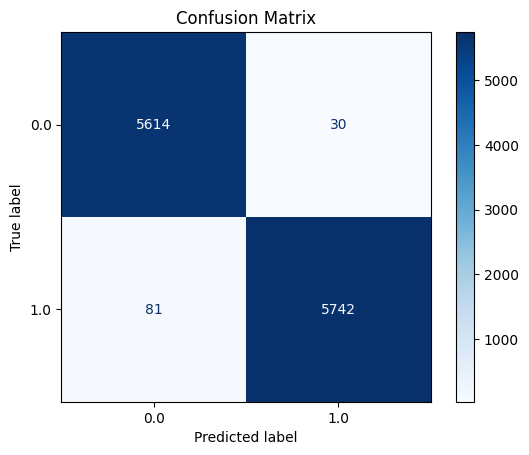

In [21]:
best_model_balanced = train_model(x_smote, y_smote)

### Comparing balanced and unbalanced models
And now, after balancing our classes, we get an even better accuracy, over 99%! But it wouldn't be fair to compare when we artificially created almost half the data. Let's compare both models, the balanced and unbalanced models, with the entire dataset as input.

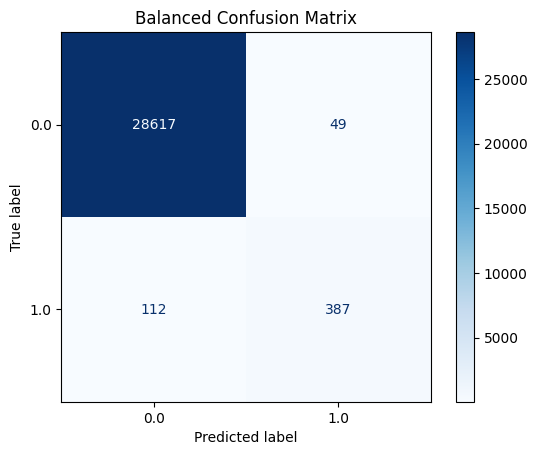

In [22]:
y_pred_balanced = best_model_balanced.predict(x_data)
balanced_accuracy = accuracy_score(y_data, y_pred_balanced)

cm = confusion_matrix(y_data, y_pred_balanced)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Balanced Confusion Matrix')
plt.show()

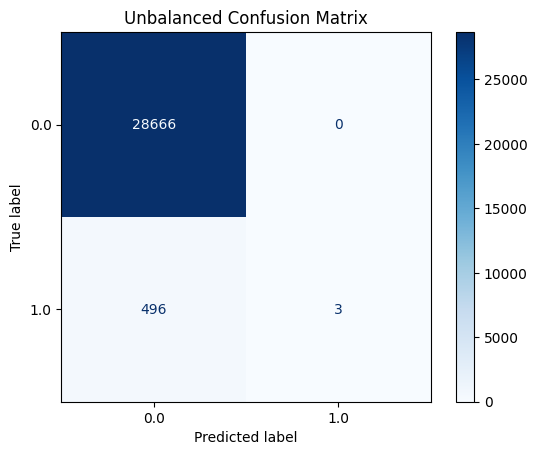

In [23]:
y_pred_unbalanced = best_model.predict(x_data)
unbalanced_accuracy = accuracy_score(y_data, y_pred_unbalanced)

cm = confusion_matrix(y_data, y_pred_unbalanced)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Unbalanced Confusion Matrix')
plt.show()

Results for the balanced model:

  - It predicted that over 400 cases were high risk, most of them rightfully so.
  - It predicted that almost all cases were not high risk, most of them rightfully so.

Results for the unbalanced mode: 

  - It predicted that close to 0 cases were high risk.
  - It predicted that almost all cases were not high risk.

Only when measured by their overall accuracy does the balanced model truly shine. But only a glimpse into the confusion matrix clearly shows that the balanced model actually learned from the high risk entries, whereas the unbalanced one barely did.

### Comparing with unseen data
In all fairness though, we're measuring them by almost the same data we trained both models on. Let's throw at them data they have never seen.

In [24]:
test_df = pd.read_csv("./test_data.csv")
test_df = pd.get_dummies(test_df, columns=['Employment status', 'Education level', 'Marital status', 'Dwelling'], dtype=int)
test_df = test_df.drop(['ID','Has a mobile phone','Job title','Employment status_Pensioner'], axis=1)
with pd.option_context("future.no_silent_downcasting", True):
    test_df['Gender'] = test_df['Gender'].replace({'M': int(0), 'F': int(1)}).astype(int)
    test_df['Has a property'] = test_df['Has a property'].replace({'N': int(0), 'Y': int(1)}).astype(int)
    test_df['Has a car'] = test_df['Has a car'].replace({'N': int(0), 'Y': int(1)}).astype(int)
scaler = MinMaxScaler()
test_df_columns = test_df.columns
test_df = scaler.fit_transform(test_df)
test_df = pd.DataFrame(test_df, columns = test_df_columns)

y_data = test_df['Is high risk']
x_data = test_df.drop(columns=['Is high risk'])

y_pred_unbalanced = best_model.predict(x_data)
unbalanced_accuracy = accuracy_score(y_data, y_pred_unbalanced)

y_pred_balanced = best_model_balanced.predict(x_data)
balanced_accuracy = accuracy_score(y_data, y_pred_balanced)

print(f"Accuracy on dataset with balanced training: {balanced_accuracy*100:.2f}%")
print(f"Accuracy on dataset set with unbalanced training: {unbalanced_accuracy*100:.2f}%")

Overall accuracy of the balanced model dropped to a little over 90% and the unbalanced model stayed high, but is it truly accurate? Let's calculate again the confusion matrices.

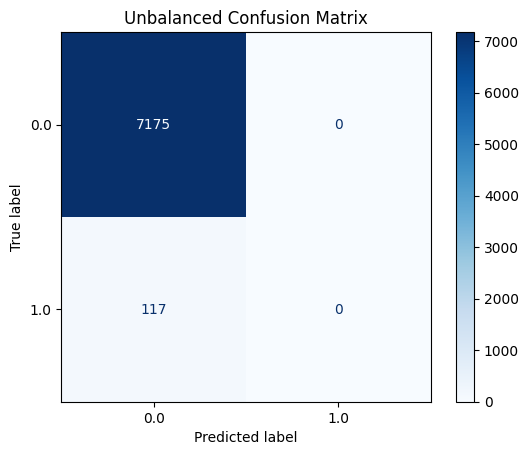

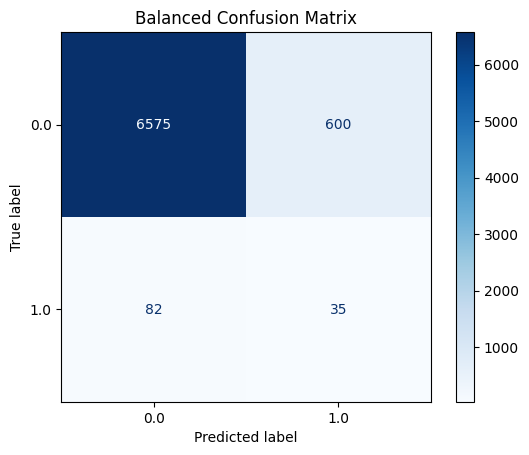

In [26]:
cm = confusion_matrix(y_data, y_pred_unbalanced)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Unbalanced Confusion Matrix')
plt.show()

cm = confusion_matrix(y_data, y_pred_balanced)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Balanced Confusion Matrix')
plt.show()

It isn't. The unbalanced model predicted almost no high risk clients, whereas the balanced model predicted multiple cases. It did so correctly at a very low accuracy which is not that good, but that is a story for a different day.